## Regression
- Regression analysis is a method used to measure the relationship between two or more variables. If the analysis uses a single variable, it is called simple regression; if multiple variables are used, it is called multiple regression analysis.
- For example, an engineer might want to know the relationship between pressure and temperature, or an educator might want to know the relationship between students' study hours and their success rates. Regression not only shows the form of the linear relationship between two (or more) variables as a function, with one being dependent and the other independent, but it also allows for predictions about one variable based on the value of another.Generally, both (or all) variables need to be on a quantitative scale.
- It is one of the supervised learning methods.

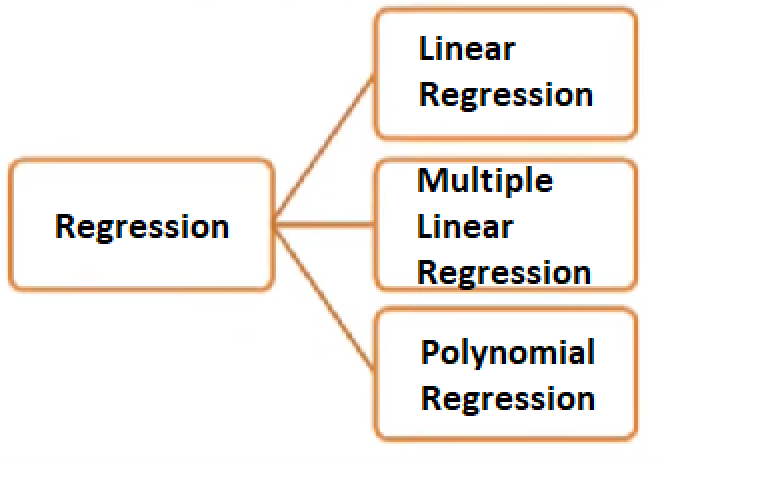

1. **Simple Linear Regression**
    - What is Simple Linear Regression?
    - Training a Simple Linear Regression Model
    - Testing/Prediction/Visualization with a Simple Linear Regression Model
2. **Multiple Linear Regression**
    - What is Multiple Linear Regression?
    - Training and Testing a Multiple Linear Regression Model
3. **Polynomial Regression**
    - What is Polynomial Regression?
    - Training and Testing a Polynomial Regression Model
4. **Evaluation of Regression Models**
    - What is R-Squared?
    - Evaluation of a Linear Regression Model with R-Squared

### Simple Linear Regression
#### What is Simple Linear Regression?
- Simple linear regression is a linear model approach used to describe the relationship between two variables.
- These variables are the dependent variable and the independent variable.

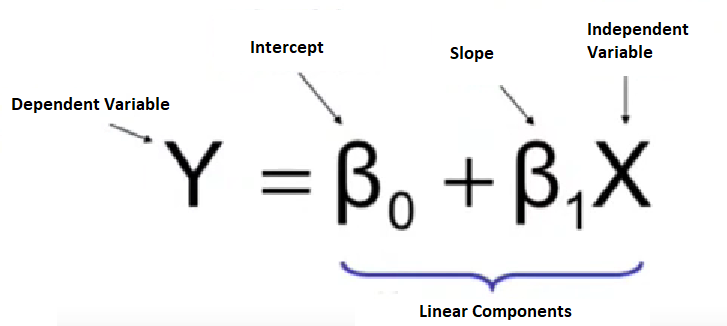
- The goal is to draw a linear line over the data in such a way that it minimizes the mean squared error.

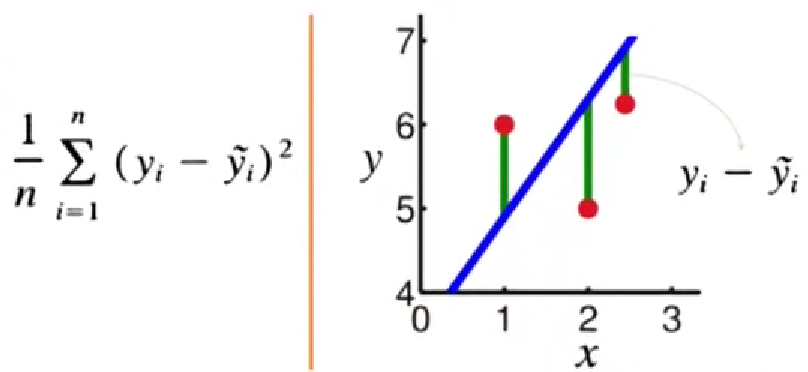
- As seen in the figure, the red line is the most suitable line that minimizes the mean squared error.

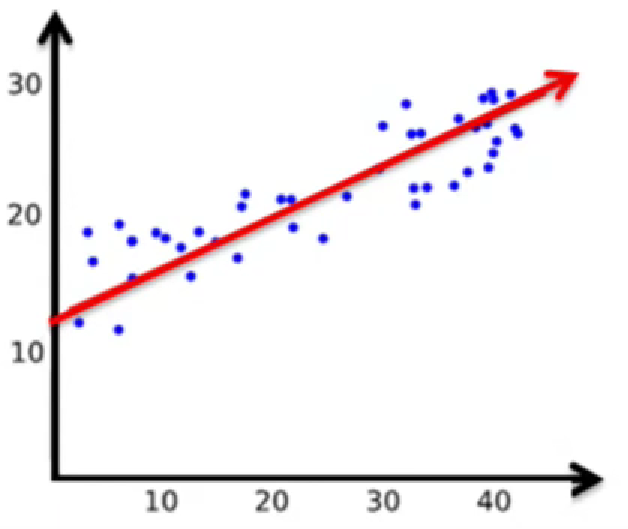

#### Training a Simple Linear Regression Model
- Import the data.
- Visualize the data.
- Train and test the simple linear regression model.

In [25]:
# Import libraries
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn 
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
# the relevant folder where the data is located
os.chdir('C:/Users/ST27/Desktop/EDU/DS/BootCamp/1. Data sources/AEY')
# import data
df = pd.read_csv('LinearReg_data.csv')

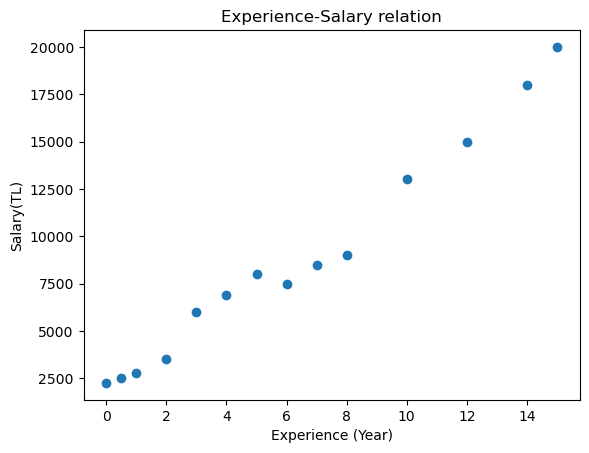

In [3]:
# Visualize data
plt.scatter(df.experience, df.salary)
plt.xlabel('Experience (Year)')
plt.ylabel('Salary(TL)')
plt.title('Experience-Salary relation')
plt.show()

In [4]:
# Linear Regression Model Training

lr_lr = LinearRegression()

# convert the data to numpy array
x = df.experience.values.reshape(-1, 1)
y = df.salary.values.reshape(-1, 1)

# training
lr_lr.fit(x,y)

LinearRegression()

In [5]:
# Finding the intercept point of the y-axis
y_intercept = np.array([0]).reshape(1, -1)
b0 = lr_lr.predict(y_intercept)
print(f'b0 : {b0}')

# Intercept
b0_ = lr_lr.intercept_
print(f'b0_ : {b0_}')

# find slope
b1 = lr_lr.coef_
print(f'b1 : {b1}')

b0 : [[1663.89519747]]
b0_ : [1663.89519747]
b1 : [[1138.34819698]]


In [6]:
# prediction
experience = 11
salary = 1663 + 1138*experience
print(salary)

prediction = lr_lr.predict(np.array([experience]).reshape(1, -1))
print(f'prediction : {prediction[0]}')

14181
prediction : [14185.72536421]


#### Testing/Prediction/Visualization with a Simple Linear Regression Model
- Using the simple linear regression model we trained in the previous section, we will make predictions and visualize the results.

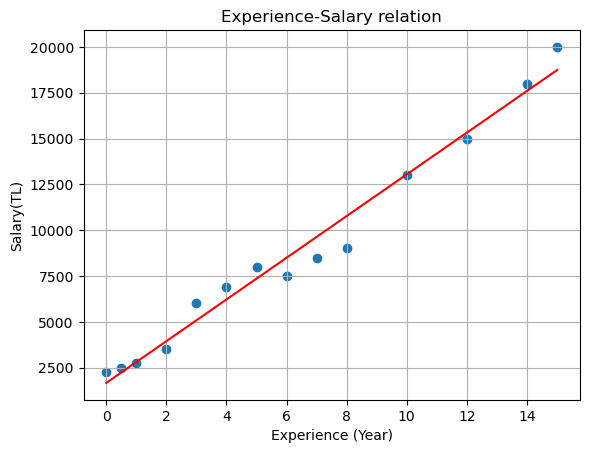

In [7]:
array = np.arange(0,16).reshape(-1, 1)

plt.figure()
plt.scatter(x, y)

y_pred_linear = lr_lr.predict(array)

plt.plot(array, y_pred_linear, color = 'red')
plt.xlabel('Experience (Year)')
plt.ylabel('Salary(TL)')
plt.title('Experience-Salary relation')
plt.grid(True)
plt.show()

### Multiple Linear Regression
#### What is Multiple Linear Regression?
- Unlike simple linear regression, it is an approach used to identify the relationship between more than one variable.

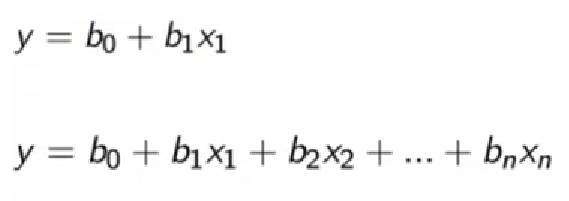
#### Training and Testing a Multiple Linear Regression Model
- In this section, we will train and test the multiple linear regression model.

In [8]:
df = pd.read_csv('MultiLinReg_data.csv')
df.head()

,experience,salary,age
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [9]:
x = df.iloc[:,[0,2]].values
y = df.iloc[:,[1]].values

In [10]:
lr_mlr = LinearRegression()

lr_mlr.fit(x, y)

LinearRegression()

In [11]:
test_x = np.array([[10,35]])
y_pred_multi = lr_mlr.predict(test_x)
print(f'prediction for {test_x[0][0]} year experience and {test_x[0][1]} years old employee: {y_pred_multi} TL')

prediction for 10 year experience and 35 years old employee: [[11046.35815877]] TL


In [12]:
test_x = np.array([[5,35]])
y_pred_multi = lr_mlr.predict(test_x)
print(f'prediction for {test_x[0][0]} year experience and {test_x[0][1]} years old employee: {y_pred_multi} TL')

prediction for 5 year experience and 35 years old employee: [[3418.85455609]] TL


### Polynomial Regression
#### What is Polynomial Regression?
- It is an analysis method used when the relationship between variables is not linear.

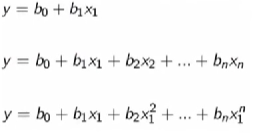
- If we apply linear regression to a dataset that is not linear, we will not obtain a good result. Therefore, applying polynomial regression to a non-linear dataset will yield better results.

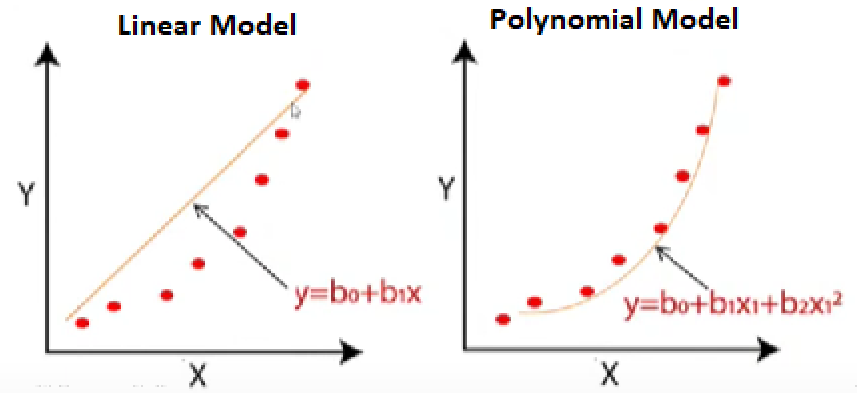
#### Training and Testing a Polynomial Regression Model
- In this section, we will train and test the Polynomial regression model.

In [14]:
df = pd.read_csv('PolyReg.csv')
df.head()

,price,top_speed
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [15]:
x_car = df.price.values.reshape(-1, 1)
y_car = df.top_speed.values.reshape(-1, 1)

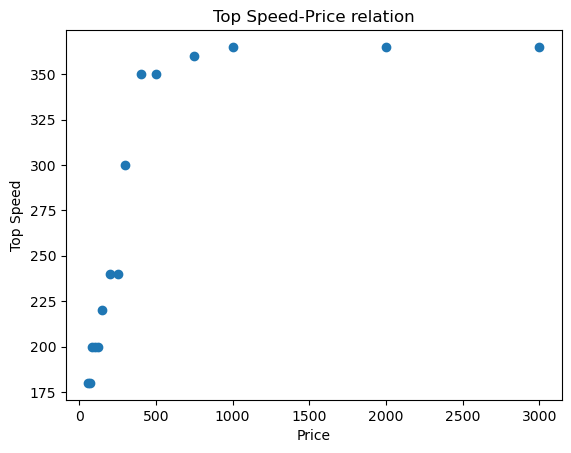

In [16]:
plt.scatter(x_car, y_car)
plt.xlabel('Price')
plt.ylabel('Top Speed')
plt.title('Top Speed-Price relation')
plt.show()

In [17]:
lr_poly = LinearRegression()
lr_poly.fit(x_car, y_car)

LinearRegression()

In [18]:
# Linear Regression
y_pred_linear = lr_poly.predict(x_car)

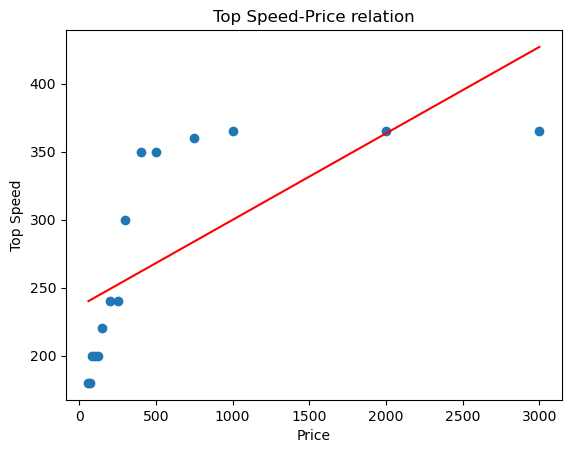

In [19]:
plt.scatter(x_car, y_car)
plt.plot(x_car, y_pred_linear, color = 'red')
plt.xlabel('Price')
plt.ylabel('Top Speed')
plt.title('Top Speed-Price relation')
plt.show()

In [20]:
price = 10000
print(f'Prediction of the speed of a {price/1000}M car: {lr_poly.predict((np.array([price]).reshape(1,-1)))}')

Prediction of the speed of a 10.0M car: [[871.66401826]]


In [22]:
# Polynomial Regression
polyr = PolynomialFeatures(degree = 4)

x_poly = polyr.fit_transform(x_car)

lr_poly1 = LinearRegression()
lr_poly1.fit(x_poly, y_car)

LinearRegression()

In [23]:
y_pred_poly = lr_poly1.predict(x_poly)

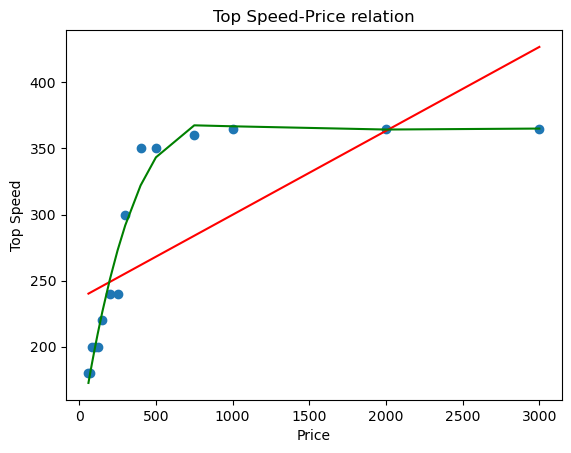

In [24]:
plt.scatter(x_car, y_car)
plt.plot(x_car, y_pred_linear, color = 'red', label = 'Linear')
plt.plot(x_car, y_pred_poly, color = 'green', label = 'Polynomial')
plt.xlabel('Price')
plt.ylabel('Top Speed')
plt.title('Top Speed-Price relation')
plt.show()

### Evaluation of Regression Models
#### What is R-Squared?
- R-squared (R²) is one of the most commonly known evaluation metrics in regression.
- R-squared is the ratio of the total variance of the dependent variables determined by the regression equation.

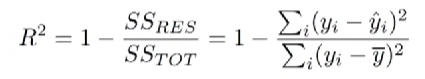
- The most common interpretation of R-squared is how well the regression model fits the observed data. For example, an R-squared of 60% indicates that 60% of the data fits the regression model. Generally, a higher R-squared indicates a better fit for the model.

#### Evaluation of Regression Models with R-Squared
- In this section, we will create linear and polynomial regression models and evaluate these two models using the R-squared method.

In [26]:
print(f'Linear Regression R2 for Car price : {r2_score(y_car,y_pred_linear)}')
print(f'Polynomial Regression R2 for Car price : {r2_score(y_car,y_pred_poly)}')

Linear Regression R2 for Car price : 0.4745823761330058
Polynomial Regression R2 for Car price : 0.969474302123569


In [27]:
df = pd.read_csv('LinearReg_data.csv')
# convert the data to numpy array
x = df.experience.values.reshape(-1, 1)
y = df.salary.values.reshape(-1, 1)

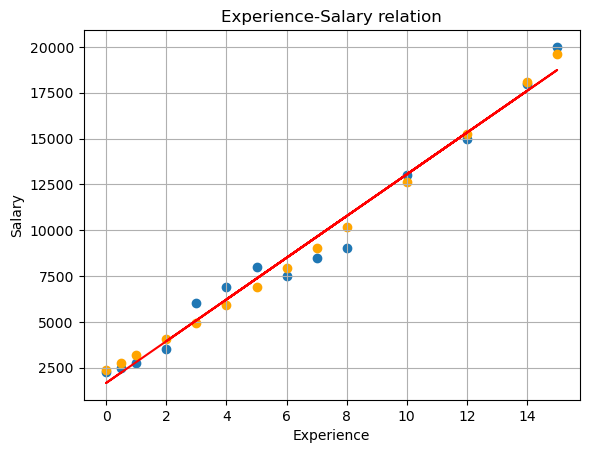

In [30]:
# Linear Regression Model training
lin_reg = LinearRegression()
lin_reg.fit(x,y)

# Polynomial Regression Model transform and training
polyr = PolynomialFeatures(degree = 2)
x_poly = polyr.fit_transform(x)

lr_poly = LinearRegression()
lr_poly.fit(x_poly, y)

# predictions
y_pred_lin = lin_reg.predict(x)
y_pred_poly = lr_poly.predict(x_poly)

#plot
plt.scatter(df.experience, df.salary)
plt.plot(x, y_pred_lin, color = 'red', label = 'Linear')
plt.scatter(x, y_pred_poly, color = 'orange', label = 'Polynomial')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience-Salary relation')
plt.grid(True)
plt.show()

In [31]:
print(f'Linear Regression R2 for Employee Salary : {r2_score(y,y_pred_lin)}')
print(f'Linear Polynomial R2 for Employee Salary : {r2_score(y,y_pred_poly)}')

Linear Regression R2 for Employee Salary : 0.9775283164949902
Linear Polynomial R2 for Employee Salary : 0.9854449464578782
